<a href="https://colab.research.google.com/github/Wander03/final-project-Wander03/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_essay1 = pd.read_csv("https://www.dropbox.com/s/ofdr4nnxzt3fdw3/Essay1?dl=1")
df_essay3 = pd.read_csv("https://www.dropbox.com/s/165nlutpzpsnqqj/Essay3?dl=1")
df_essay4 = pd.read_csv("https://www.dropbox.com/s/qwqbtypu3fpxhdr/Essay4?dl=1")
df_essay5 = pd.read_csv("https://www.dropbox.com/s/tc6fnp9nqw0srp3/Essay5?dl=1")
df_essay6 = pd.read_csv("https://www.dropbox.com/s/1m6g91hf2r9yfcf/Essay6?dl=1")
df_essay7 = pd.read_csv("https://www.dropbox.com/s/2rje35hv0vyf8kh/Essay7?dl=1")
df_essay8 = pd.read_csv("https://www.dropbox.com/s/vt6cr45qclkyfdt/Essay8?dl=1")

In [ ]:
df_essay1_pol = pd.read_csv("https://www.dropbox.com/s/jj74qpet3i0ts8o/essay1_polarities?dl=1")
df_sentences1 = pd.read_csv("https://www.dropbox.com/s/7ah1tv7xzsrne3v/essay1_polarities_sentences?dl=1")
df_essay3_pol = pd.read_csv("https://www.dropbox.com/s/nvz01h92q809ws4/essay3_polarities?dl=1")
df_sentences3 = pd.read_csv("https://www.dropbox.com/s/rv71ij43xkcf7yi/essay3_polarities_sentences?dl=1")
df_essay4_pol = pd.read_csv("https://www.dropbox.com/s/kvin3ughndsls7y/essay4_polarities?dl=1")
df_sentences4 = pd.read_csv("https://www.dropbox.com/s/5bgwryknwni1478/essay4_polarities_sentences?dl=1")
df_essay5_pol = pd.read_csv("https://www.dropbox.com/s/6io0b6vutf6ifkh/essay5_polarities?dl=1")
df_sentences5 = pd.read_csv("https://www.dropbox.com/s/ow7f2l4h0j7ahxt/essay5_polarities_sentences?dl=1")
df_essay6_pol = pd.read_csv("https://www.dropbox.com/s/lebmv8p541t7rvk/essay6_polarities?dl=1")
df_sentences6 = pd.read_csv("https://www.dropbox.com/s/8mksv1jwrhm9pfl/essay6_polarities_sentences?dl=1")
df_essay7_pol = pd.read_csv("https://www.dropbox.com/s/jci22czi6lluhty/essay7_polarities?dl=1")
df_sentences7 = pd.read_csv("https://www.dropbox.com/s/kzpfrwfpue64zne/essay7_polarities_sentences?dl=1")
df_essay8_pol = pd.read_csv("https://www.dropbox.com/s/h5zi92t8hpm96ze/essay8_polarities?dl=1")
df_sentences8 = pd.read_csv("https://www.dropbox.com/s/tkppi6twzjv4cmj/essay8_polarities_sentences?dl=1")

In [ ]:
def merge_df(df_lst, df_pol_lst, set_lst):
  results = []
  for index, (df, pol) in enumerate(zip(df_lst, df_pol_lst)):
    df["set_num"] = set_lst[index] 
    for i in range(len(df)):
      df["Unnamed: 0"][i] = i
    results.append(df.merge(pol, on=["Unnamed: 0"], how="outer"))
  return results

In [ ]:
df_lst = [df_essay1, df_essay3, df_essay4, df_essay5, df_essay6, df_essay7, df_essay8]
df_pol_lst = [df_essay1_pol, df_essay3_pol, df_essay4_pol, df_essay5_pol, df_essay6_pol, df_essay7_pol, df_essay8_pol]
set_lst = [1, 3, 4, 5, 6, 7, 8]

merged_lst = merge_df(df_lst, df_pol_lst, set_lst)
essay1 = merged_lst[0]
essay3 = merged_lst[1]
essay4 = merged_lst[2]
essay5 = merged_lst[3]
essay6 = merged_lst[4]
essay7 = merged_lst[5]
essay8 = merged_lst[6]

df_essay_all = pd.concat([essay1, essay3, essay4, essay5, essay6, essay7, essay8])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


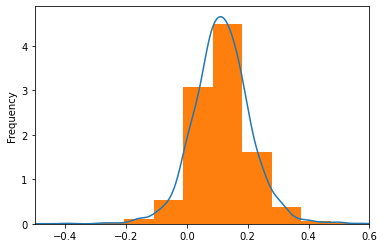

In [ ]:
essay1.sort_values(by = "result.polarity")
essay1["result.polarity"].plot.density(xlim=(-0.5, 0.6))
essay1["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)

(             rater1_domain1  rater2_domain1  domain1_score  avg_score  \
 result.type                                                             
 negative           4.006711        4.013423       8.020134   4.010067   
 neutral            3.968750        4.031250       8.000000   4.000000   
 positive           4.290262        4.295880       8.586142   4.293071   
 
                   pct  
 result.type            
 negative     0.668345  
 neutral      0.666667  
 positive     0.715512  , result.type
 negative     149
 neutral       32
 positive    1602
 Name: essay_id, dtype: int64)

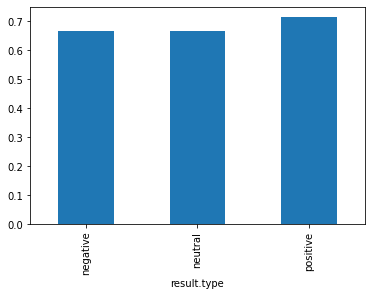

In [ ]:
result1 = essay1.groupby("result.type")
result1["pct"].mean().plot.bar()
result1[["rater1_domain1", "rater2_domain1", "domain1_score", "avg_score", "pct"]].mean(), result1["essay_id"].count()

array([-0.0320396])

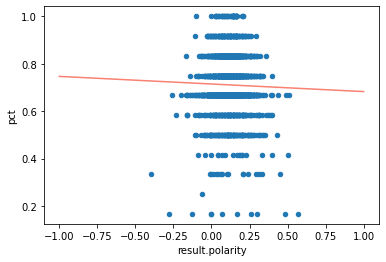

In [ ]:
essay1_model = LinearRegression()
essay1_model.fit(
    X=essay1[["result.polarity"]],
    y=essay1["pct"]
)
essay1_model.predict(
    X = essay1[["result.polarity"]]
)

X_new = pd.DataFrame()
X_new["result.polarity"] = np.linspace(-1, 1)
y_new_ = pd.Series(
    essay1_model.predict(X_new),
    index=X_new["result.polarity"]   
)
essay1.plot.scatter(x="result.polarity", y="pct")
y_new_.plot.line(c = "salmon")
essay1_model.coef_

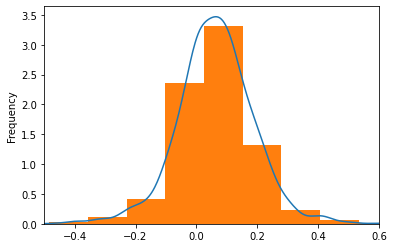

In [ ]:
essay3.sort_values(by = "result.polarity")
essay3["result.polarity"].plot.density(xlim=(-0.5, 0.6))
essay3["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)

(             rater1_domain1  rater2_domain1  avg_score       pct
 result.type                                                     
 negative           1.673378        1.626398   1.649888  0.549963
 neutral            1.348837        1.290698   1.319767  0.439922
 positive           1.794635        1.755239   1.774937  0.591646, result.type
 negative     447
 neutral       86
 positive    1193
 Name: essay_id, dtype: int64)

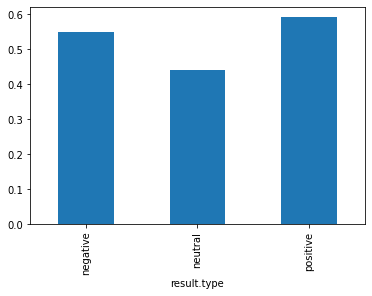

In [ ]:
result3 = essay3.groupby("result.type")
result3["pct"].mean().plot.bar()
result3[["rater1_domain1", "rater2_domain1", "avg_score", "pct"]].mean(), result3["essay_id"].count()

array([-0.00063338])

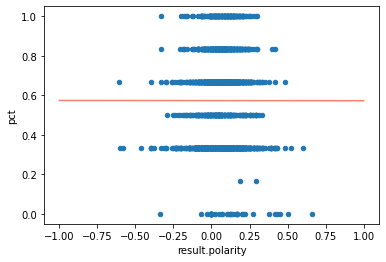

In [ ]:
essay3_model = LinearRegression()
essay3_model.fit(
    X=essay3[["result.polarity"]],
    y=essay3["pct"]
)
essay3_model.predict(
    X = essay1[["result.polarity"]]
)

X_new = pd.DataFrame()
X_new["result.polarity"] = np.linspace(-1, 1)
y_new_ = pd.Series(
    essay3_model.predict(X_new),
    index=X_new["result.polarity"]   
)
essay3.plot.scatter(x="result.polarity", y="pct")
y_new_.plot.line(c = "salmon")
essay3_model.coef_

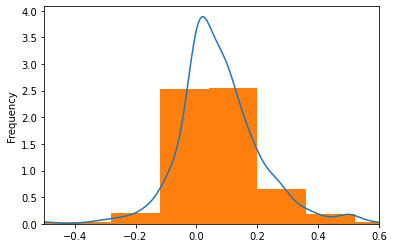

In [ ]:
essay4.sort_values(by = "result.polarity")
essay4["result.polarity"].plot.density(xlim=(-0.5, 0.6))
essay4["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)

(             rater1_domain1  rater2_domain1  avg_score       pct
 result.type                                                     
 negative           1.393586        1.390671   1.392128  0.464043
 neutral            0.733333        0.728205   0.730769  0.243590
 positive           1.392857        1.388799   1.390828  0.463609, result.type
 negative     343
 neutral      195
 positive    1232
 Name: essay_id, dtype: int64)

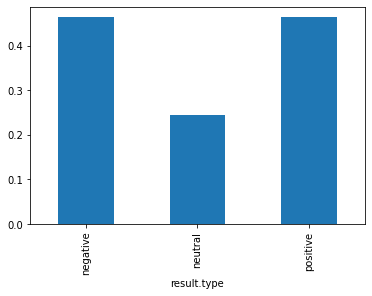

In [ ]:
result4 = essay4.groupby("result.type")
result4["pct"].mean().plot.bar()
result4[["rater1_domain1", "rater2_domain1", "avg_score", "pct"]].mean(), result4["essay_id"].count()

(-0.16841296391502963, 0.45278227193138454)

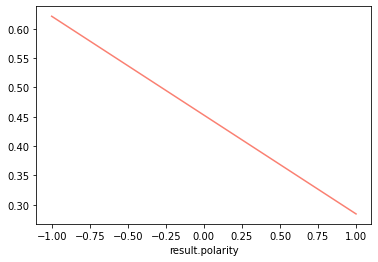

In [ ]:
essay4_model = LinearRegression()
essay4_model.fit(
    X=essay4[["result.polarity"]],
    y=essay4["pct"]
)
essay4_model.predict(
    X = essay4[["result.polarity"]]
)

X_new = pd.DataFrame()
X_new["result.polarity"] = np.linspace(-1, 1)
y_new_ = pd.Series(
    essay4_model.predict(X_new),
    index=X_new["result.polarity"]   
)
# essay4.plot.scatter(x="result.polarity", y="pct")
y_new_.plot.line(c = "salmon")
essay4_model.coef_[0], essay4_model.intercept_

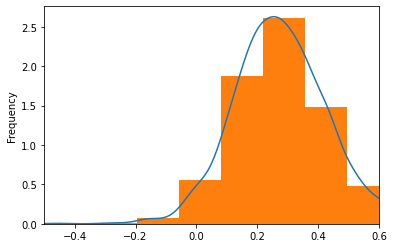

In [ ]:
essay5.sort_values(by = "result.polarity")
essay5["result.polarity"].plot.density(xlim=(-0.5, 0.6))
essay5["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)

(             rater1_domain1  rater2_domain1  avg_score       pct
 result.type                                                     
 negative           1.239130        1.304348   1.271739  0.317935
 neutral            1.041667        0.958333   1.000000  0.250000
 positive           2.263401        2.263401   2.263401  0.565850, result.type
 negative      46
 neutral       24
 positive    1735
 Name: essay_id, dtype: int64)

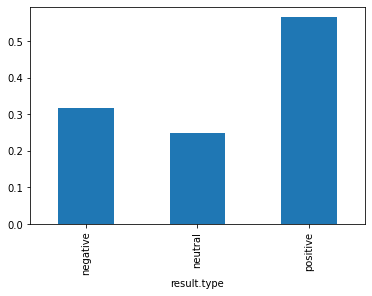

In [ ]:
result5 = essay5.groupby("result.type")
result5["pct"].mean().plot.bar()
result5[["rater1_domain1", "rater2_domain1", "avg_score", "pct"]].mean(), result5["essay_id"].count()

(0.029551334489909244, 0.5470585274730385)

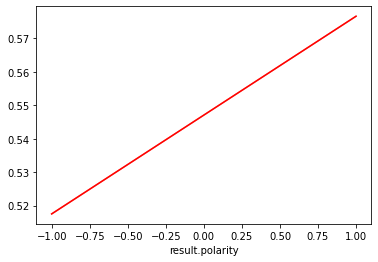

In [ ]:
essay5_model = LinearRegression()
essay5_model.fit(
    X=essay5[["result.polarity"]],
    y=essay5["pct"]
)
essay5_model.predict(
    X = essay5[["result.polarity"]]
)

X_new = pd.DataFrame()
X_new["result.polarity"] = np.linspace(-1, 1)
y_new_ = pd.Series(
    essay5_model.predict(X_new),
    index=X_new["result.polarity"]   
)
y_new_.plot.line(c = "salmon")
x = np.linspace(-1,1,10)
y = 0.02955133*x+0.54706
plt.plot(x, y, '-r', label='y=2x+1')
essay5_model.coef_[0], essay5_model.intercept_


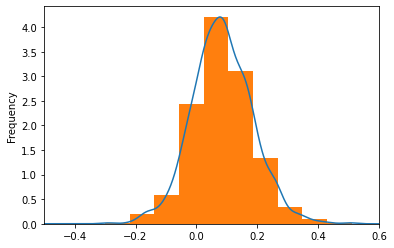

In [ ]:
essay6.sort_values(by = "result.polarity")
essay6["result.polarity"].plot.density(xlim=(-0.5, 0.6))
essay6["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)

(             rater1_domain1  rater2_domain1  avg_score       pct
 result.type                                                     
 negative           2.564356        2.495050   2.529703  0.632426
 neutral            2.456140        2.421053   2.438596  0.609649
 positive           2.564583        2.566667   2.565625  0.641406, result.type
 negative     303
 neutral       57
 positive    1440
 Name: essay_id, dtype: int64)

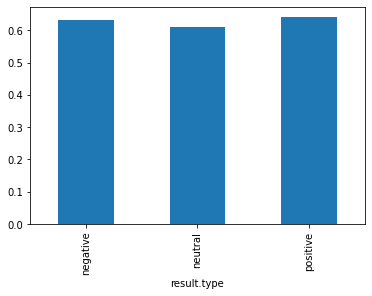

In [ ]:
result6 = essay6.groupby("result.type")
result6["pct"].mean().plot.bar()
result6[["rater1_domain1", "rater2_domain1", "avg_score", "pct"]].mean(), result6["essay_id"].count()

array([-0.1992099])

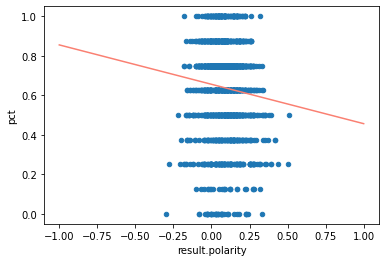

In [ ]:
essay6_model = LinearRegression()
essay6_model.fit(
    X=essay6[["result.polarity"]],
    y=essay6["pct"]
)
essay6_model.predict(
    X = essay6[["result.polarity"]]
)

X_new = pd.DataFrame()
X_new["result.polarity"] = np.linspace(-1, 1)
y_new_ = pd.Series(
    essay6_model.predict(X_new),
    index=X_new["result.polarity"]   
)
essay6.plot.scatter(x="result.polarity", y="pct")
y_new_.plot.line(c = "salmon")
essay6_model.coef_

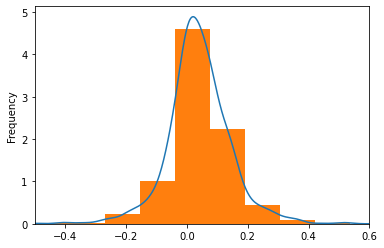

In [ ]:
essay7.sort_values(by = "result.polarity")
essay7["result.polarity"].plot.density(xlim=(-0.5, 0.6))
essay7["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)

(             rater1_domain1  rater2_domain1  avg_score       pct
 result.type                                                     
 negative           7.690745        7.699774   7.695260  0.641272
 neutral            7.303571        7.125000   7.214286  0.601190
 positive           8.248521        8.287968   8.268245  0.689020, result.type
 negative     443
 neutral      112
 positive    1014
 Name: essay_id, dtype: int64)

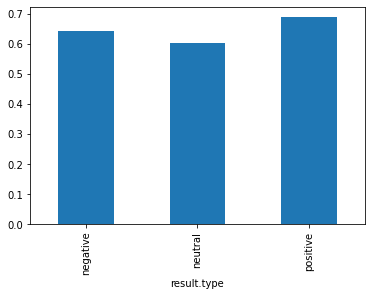

In [ ]:
result7 = essay7.groupby("result.type")
result7["pct"].mean().plot.bar()
result7[["rater1_domain1", "rater2_domain1", "avg_score", "pct"]].mean(), result7["essay_id"].count()

array([0.11391055])

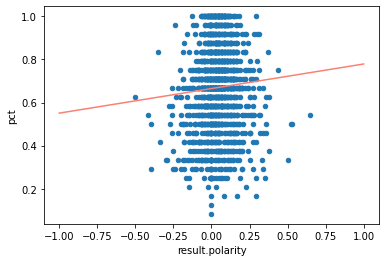

In [ ]:
essay7_model = LinearRegression()
essay7_model.fit(
    X=essay7[["result.polarity"]],
    y=essay7["pct"]
)
essay7_model.predict(
    X = essay7[["result.polarity"]]
)

X_new = pd.DataFrame()
X_new["result.polarity"] = np.linspace(-1, 1)
y_new_ = pd.Series(
    essay7_model.predict(X_new),
    index=X_new["result.polarity"]   
)
essay7.plot.scatter(x="result.polarity", y="pct")
y_new_.plot.line(c = "salmon")
essay7_model.coef_

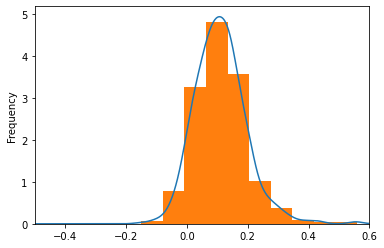

In [ ]:
essay8.sort_values(by = "result.polarity")
essay8["result.polarity"].plot.density(xlim=(-0.5, 0.6))
essay8["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)

(             rater1_domain1  rater2_domain1  avg_score       pct
 result.type                                                     
 negative          17.636364       17.977273  17.806818  0.593561
 neutral           16.416667       17.250000  16.833333  0.561111
 positive          18.419790       18.619190  18.519490  0.617316, result.type
 negative     44
 neutral      12
 positive    667
 Name: essay_id, dtype: int64)

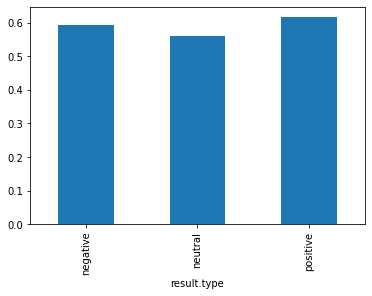

In [ ]:
result8 = essay8.groupby("result.type")
result8["pct"].mean().plot.bar()
result8[["rater1_domain1", "rater2_domain1", "avg_score", "pct"]].mean(), result8["essay_id"].count()

array([-0.11815285])

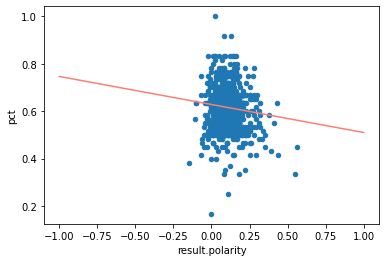

In [ ]:
essay8_model = LinearRegression()
essay8_model.fit(
    X=essay8[["result.polarity"]],
    y=essay8["pct"]
)
essay8_model.predict(
    X = essay8[["result.polarity"]]
)

X_new = pd.DataFrame()
X_new["result.polarity"] = np.linspace(-1, 1)
y_new_ = pd.Series(
    essay8_model.predict(X_new),
    index=X_new["result.polarity"]   
)
essay8.plot.scatter(x="result.polarity", y="pct")
y_new_.plot.line(c = "salmon")
essay8_model.coef_

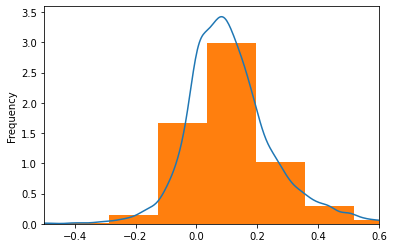

In [ ]:
df_essay_all.sort_values(by = "result.polarity")
df_essay_all["result.polarity"].plot.density(xlim=(-0.5, 0.6))
df_essay_all["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)

(             rater1_domain1  rater2_domain1  avg_score       pct
 result.type                                                     
 negative           3.853521        3.842254   3.847887  0.575230
 neutral            3.023166        2.988417   3.005792  0.427574
 positive           4.390409        4.405381   4.397895  0.612298, result.type
 negative    1775
 neutral      518
 positive    8883
 Name: essay_id, dtype: int64)

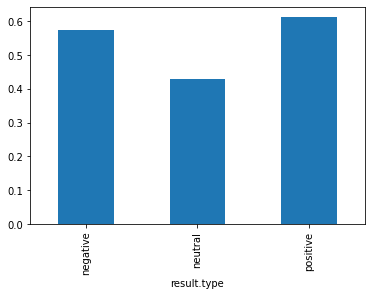

In [ ]:
result_all = df_essay_all.groupby("result.type")
result_all["pct"].mean().plot.bar()
result_all[["rater1_domain1", "rater2_domain1", "avg_score", "pct"]].mean(), result_all["essay_id"].count()

array([-0.08034767])

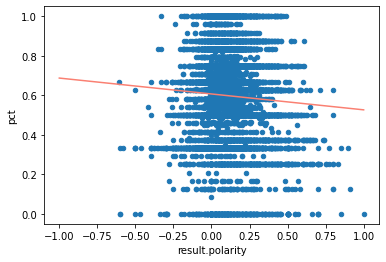

In [ ]:
df_essay_all_model = LinearRegression()
df_essay_all_model.fit(
    X=df_essay_all[["result.polarity"]],
    y=df_essay_all["pct"]
)
df_essay_all_model.predict(
    X = df_essay_all[["result.polarity"]]
)

X_new = pd.DataFrame()
X_new["result.polarity"] = np.linspace(-1, 1)
y_new_ = pd.Series(
    df_essay_all_model.predict(X_new),
    index=X_new["result.polarity"]   
)
df_essay_all.plot.scatter(x="result.polarity", y="pct")
y_new_.plot.line(c = "salmon")
df_essay_all_model.coef_

In [ ]:
df_essay_all["idx"] = df_essay_all["essay_id"] - 1

In [ ]:
df_essay_all = df_essay_all.set_index("idx")

In [ ]:
df_essay_all["result.level"] = "Neutral"
for x in df_essay_all["essay_id"]:
  if df_essay_all["result.polarity"][x-1] > 0.8:
    df_essay_all["result.level"][x-1] = "Entirely Positive"
  elif df_essay_all["result.polarity"][x-1] > 0.6:
    df_essay_all["result.level"][x-1] = "Very Positive"
  elif df_essay_all["result.polarity"][x-1] > 0.4:
    df_essay_all["result.level"][x-1] = "Mostly Positive"
  elif df_essay_all["result.polarity"][x-1] > 0.2:
    df_essay_all["result.level"][x-1] = "Positive"
  elif df_essay_all["result.polarity"][x-1] > 0:
    df_essay_all["result.level"][x-1] = "Slightly Positive"
  elif df_essay_all["result.polarity"][x-1] == 0:
    df_essay_all["result.level"][x-1] = "Neutral"
  elif df_essay_all["result.polarity"][x-1] > -0.2:
    df_essay_all["result.level"][x-1] = "Slightly Negative"
  elif df_essay_all["result.polarity"][x-1] > -0.4:
    df_essay_all["result.level"][x-1] = "Negative"
  elif df_essay_all["result.polarity"][x-1] > -0.6:
    df_essay_all["result.level"][x-1] = "Mostly Negative"
  elif df_essay_all["result.polarity"][x-1] > -0.8:
    df_essay_all["result.level"][x-1] = "Very Negative"
  else:
    df_essay_all["result.level"][x-1] = "Entirely Negative"



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/l

In [ ]:
n = df_essay_all["result.level"].value_counts(sort=True)

Slightly Positive    6601
Positive             1832
Slightly Negative    1645
Neutral               518
Mostly Positive       385
Negative              109
Very Positive          59
Mostly Negative        17
Entirely Positive       6
Very Negative           4
Name: result.level, dtype: int64

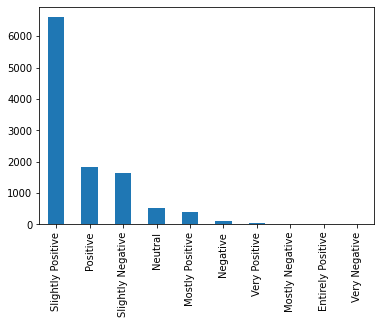

In [ ]:
n.plot.bar()
n

In [ ]:
positive = ["Slightly Positive", "Positive", "Mostly Positive", "Very Positive", "Entirely Positive"]
negative = ["Neutral", "Slightly Negative", "Negative", "Mostly Negative", "Very Negative"]

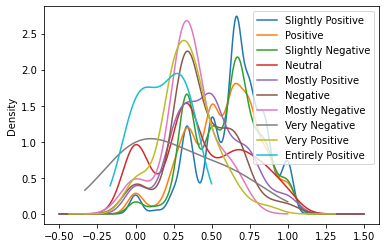

In [ ]:
for level in df_essay_all["result.level"].unique():
    df_essay_all[df_essay_all["result.level"] == level]["pct"].plot.density(
        label= level,
        legend=True,
    )

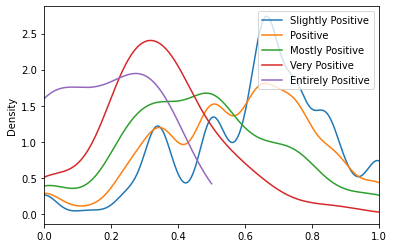

In [ ]:
for level in positive:
    df_essay_all[df_essay_all["result.level"] == level]["pct"].plot.density(
        label= level,
        legend=True,
        xlim=(0, 1)
    )

In [ ]:
df1 = df_essay_all[df_essay_all["result.level"] == "Neutral"]
df1.set_index("essay_id")
df2 = df_essay_all[df_essay_all["result.level"] == "Slightly Negative"]
df2.set_index("essay_id")
df3 = df_essay_all[df_essay_all["result.level"] == "Negative"]
df3.set_index("essay_id")
df4 = df_essay_all[df_essay_all["result.level"] == "Mostly Negative"]
df4.set_index("essay_id")
df5 = df_essay_all[df_essay_all["result.level"] == "Very Negative"]
df5.set_index("essay_id")
df6 = df_essay_all[df_essay_all["result.level"] == "Entirely Positive"]
df6.set_index("essay_id")
df7 = df_essay_all[df_essay_all["result.level"] == "Slightly Positive"]
df7.set_index("essay_id")
df8 = df_essay_all[df_essay_all["result.level"] == "Positive"]
df8.set_index("essay_id")
df9 = df_essay_all[df_essay_all["result.level"] == "Mostly Positive"]
df9.set_index("essay_id")
df0 = df_essay_all[df_essay_all["result.level"] == "Very Positive"]
df0.set_index("essay_id")


,Unnamed: 0,essay,rater1_domain1,rater2_domain1,domain1_score,avg_score,pct,set_num,sentences,result.polarity,result.type,result.level
essay_id,,,,,,,,,,,,
7648,1665,The features of the setting affect the cyclist...,0,0,0,0.0,0.000000,3,[{'sentence': 'The features of the setting aff...,0.66,positive,Very Positive
8991,128,The author concludes the story with that parag...,0,0,0,0.0,0.000000,4,[{'sentence': 'The author concludes the story ...,0.70,positive,Very Positive
9656,791,The author concludes the story with the saying...,1,1,2,1.0,0.333333,4,[{'sentence': 'The author concludes the story ...,0.70,positive,Very Positive
9769,903,I think he did because he wanted to show how h...,0,0,0,0.0,0.000000,4,[{'sentence': 'I think he did because he wante...,0.70,positive,Very Positive
10062,1196,I guess she felt that it was a good way to uni...,0,0,0,0.0,0.000000,4,[{'sentence': 'I guess she felt that it was a ...,0.70,positive,Very Positive
10248,1380,The author concludes the story with that parag...,0,0,0,0.0,0.000000,4,[{'sentence': 'The author concludes the story ...,0.70,positive,Very Positive
10637,1764,I think the author concludes this story like t...,1,1,2,1.0,0.333333,4,[{'sentence': 'I think the author concludes th...,0.77,positive,Very Positive
11876,49,"In the memoir, Narciso Rodriguez, the author's...",2,1,3,1.5,0.375000,5,"[{'sentence': ""In the memoir, Narciso Rodrigue...",0.62,positive,Very Positive
11935,108,H loved His parents @CAPS1 loved his home @CAP...,0,1,1,0.5,0.125000,5,[{'sentence': 'H loved His parents @CAPS1 love...,0.70,positive,Very Positive


In [ ]:
df_essay_pos = df_essay_all[df_essay_all["result.type"] == "positive"]
df_essay_neg = df_essay_all[df_essay_all["result.type"] != "positive"]


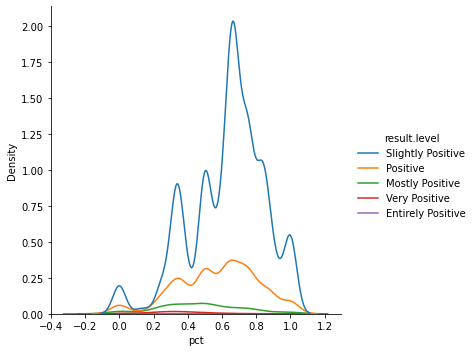

In [ ]:
sns.displot(df_essay_pos, hue="result.level", x = "pct", kind = "kde")

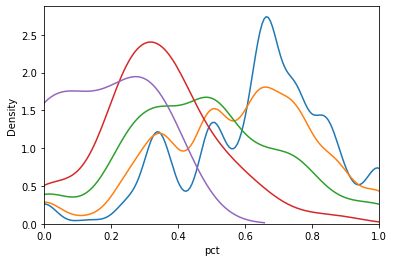

In [ ]:
fig = sns.kdeplot(df7["pct"], shade=False, color="tab:blue", legend = True)
fig = sns.kdeplot(df8["pct"], shade=False, color="tab:orange", legend = True)
fig = sns.kdeplot(df9["pct"], shade=False, color="tab:green", legend = True)
fig = sns.kdeplot(df0["pct"], shade=False, color="tab:red")
fig = sns.kdeplot(df6["pct"], shade=False, color="tab:purple", legend = True)
fig.set(xlim=(0, 1))
plt.show()

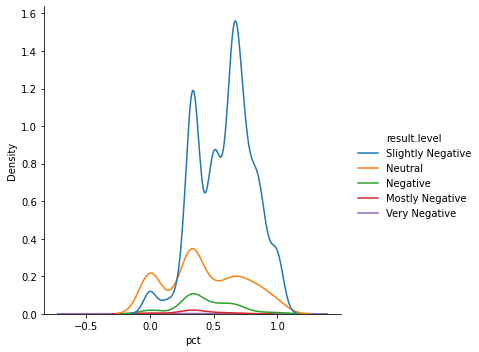

In [ ]:
sns.displot(df_essay_neg, hue="result.level", x = "pct", kind = "kde")

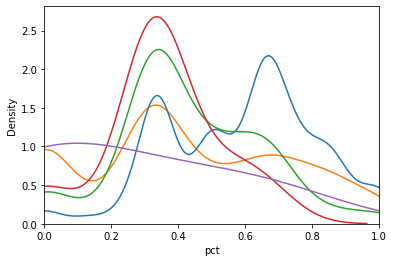

In [ ]:
fig = sns.kdeplot(df1["pct"], shade=False, color="tab:orange")
fig = sns.kdeplot(df2["pct"], shade=False, color="tab:blue", legend = True)
fig = sns.kdeplot(df3["pct"], shade=False, color="tab:green", legend = True)
fig = sns.kdeplot(df4["pct"], shade=False, color="tab:red", legend = True)
fig = sns.kdeplot(df5["pct"], shade=False, color="tab:purple", legend = True)

fig.set(xlim=(0, 1))
plt.show()


In [ ]:
df_essay_all["essay_len_char"] = 0
for essay in df_essay_all["essay_id"]:
  df_essay_all["essay_len_char"][essay-1] = len(df_essay_all["essay"][essay-1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
essay5["essay_len_char"] = 0
for essay in essay5["Unnamed: 0"]:
  essay5["essay_len_char"][essay] = len(essay5["essay"][essay])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
essay4["essay_len_char"] = 0
for essay in essay4["Unnamed: 0"]:
  essay4["essay_len_char"][essay] = len(essay5["essay"][essay])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([-2.68499221e-05])

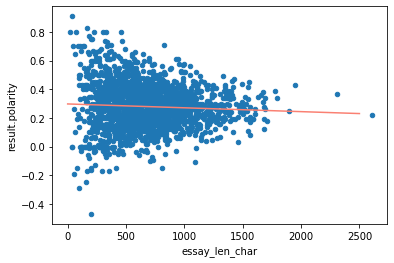

In [ ]:
essay5_model_len = LinearRegression()
essay5_model_len.fit(
    X=essay5[["essay_len_char"]],
    y=essay5["result.polarity"]
)
essay5_model_len.predict(
    X = essay5[["essay_len_char"]]
)

X_new = pd.DataFrame()
X_new["essay_len_char"] = np.linspace(0, 2500)
y_new_ = pd.Series(
    essay5_model_len.predict(X_new),
    index=X_new["essay_len_char"]   
)
essay5.plot.scatter(x="essay_len_char", y="result.polarity")
y_new_.plot.line(c = "salmon")
essay5_model_len.coef_

array([1.55381772e-05])

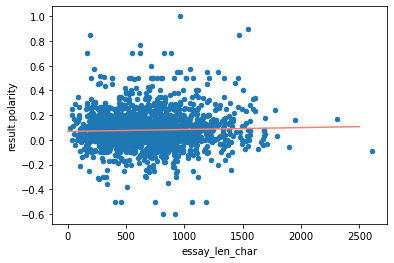

In [ ]:
essay4_model_len = LinearRegression()
essay4_model_len.fit(
    X=essay4[["essay_len_char"]],
    y=essay4["result.polarity"]
)
essay5_model_len.predict(
    X = essay4[["essay_len_char"]]
)

X_new = pd.DataFrame()
X_new["essay_len_char"] = np.linspace(0, 2500)
y_new_ = pd.Series(
    essay4_model_len.predict(X_new),
    index=X_new["essay_len_char"]   
)
essay4.plot.scatter(x="essay_len_char", y="result.polarity")
y_new_.plot.line(c = "salmon")
essay4_model_len.coef_

In [ ]:
middle_school_polarity = (essay1["result.polarity"].sum() + essay5["result.polarity"].sum() + essay7["result.polarity"].sum()) / (len(essay1) + len(essay5) + len(essay7))
high_school_polarity = (essay3["result.polarity"].sum() + essay4["result.polarity"].sum() + essay6["result.polarity"].sum() + essay8["result.polarity"].sum()) / (len(essay3) + len(essay4) + len(essay6) + len(essay8))
middle_school_polarity, high_school_polarity

(0.1501628853984875, 0.07974580495098854)

In [ ]:
expository_polarity = (essay1["result.polarity"].sum() + essay7["result.polarity"].sum() + essay8["result.polarity"].sum()) / (len(essay1) + len(essay7) + len(essay8))
source_based_polarity = (essay3["result.polarity"].sum() + essay4["result.polarity"].sum() + essay5["result.polarity"].sum() + essay6["result.polarity"].sum()) / (len(essay3) + len(essay4) + len(essay5) + len(essay6))
expository_polarity, source_based_polarity

(0.08568343558282208, 0.12747782002534855)

In [ ]:
len(df_essay_all)

11176

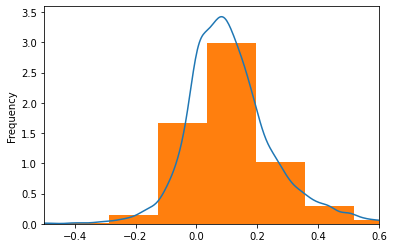

In [ ]:
df_essay_all.sort_values(by = "result.polarity")
df_essay_all["result.polarity"].plot.density(xlim=(-0.5, 0.6))
df_essay_all["result.polarity"].plot.hist(xlim=(-0.5, 0.6), density = True)